# Определение перспективного тарифа для телеком-компании

## Изучение данных из файла

In [1]:
# импорт библиотек
import pandas as pd
import numpy as np
from functools import reduce
import math
import matplotlib.pyplot as plt
from scipy import stats as st

In [2]:
# чтение файлов с данными и сохранение в df* с использованием конструкции try-except
try:
    df_calls = pd.read_csv('C:/Users/datasets/calls.csv')  # локальный путь
    df_internet = pd.read_csv('C:/Users/datasets/internet.csv')
    df_messages = pd.read_csv('C:/Users/datasets/messages.csv')
    df_tariffs = pd.read_csv('C:/Users/datasets/tariffs.csv')
    df_users = pd.read_csv('C:/Users/datasets/users.csv')
except:
    df_calls = pd.read_csv('/datasets/calls.csv')  # серверный путь
    df_internet = pd.read_csv('/datasets/internet.csv')
    df_messages = pd.read_csv('/datasets/messages.csv')
    df_tariffs = pd.read_csv('/datasets/tariffs.csv')
    df_users = pd.read_csv('/datasets/users.csv')

In [3]:
# получение 5 строк таблицы df_calls
df_calls.head()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


In [4]:
# получение общей информации о данных в таблице df_calls
df_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


In [5]:
# получение статистической информации о звонках
df_calls.describe()

,duration,user_id
count,202607.000000,202607.000000
mean,6.755887,1253.940619
std,5.843365,144.722751
min,0.000000,1000.000000
25%,1.300000,1126.000000
50%,6.000000,1260.000000
75%,10.700000,1379.000000
max,38.000000,1499.000000


In [6]:
# получение 5 строк таблицы df_internet
df_internet.head()

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


In [7]:
# получение общей информации о данных в таблице df_internet
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


In [8]:
# получение статистической информации об интернет-трафике
df_internet.describe()

,Unnamed: 0,mb_used,user_id
count,149396.000000,149396.000000,149396.000000
mean,74697.500000,370.192426,1252.099842
std,43127.054745,278.300951,144.050823
min,0.000000,0.000000,1000.000000
25%,37348.750000,138.187500,1130.000000
50%,74697.500000,348.015000,1251.000000
75%,112046.250000,559.552500,1380.000000
max,149395.000000,1724.830000,1499.000000


In [9]:
# получение 5 строк таблицы df_messages
df_messages.sample(5)

,id,message_date,user_id
117139,1477_22,2018-06-03,1477
74841,1317_80,2018-10-20,1317
29073,1127_96,2018-10-18,1127
58680,1257_472,2018-09-12,1257
103558,1421_521,2018-06-24,1421


In [10]:
# получение общей информации о данных в таблице df_messages
df_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


In [11]:
# получение статистической информации о сообщениях
df_messages.describe()

,user_id
count,123036.000000
mean,1256.989410
std,143.523967
min,1000.000000
25%,1134.000000
50%,1271.000000
75%,1381.000000
max,1499.000000


In [12]:
# просмотр строк таблицы df_tariffs
df_tariffs.head()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [13]:
# получение общей информации о данных в таблице df_tariffs
df_tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


In [14]:
# получение 5 строк таблицы df_users
df_users.sample(5)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
476,1476,50,NaN,Москва,Валентина,Семенова,2018-04-30,ultra
426,1426,56,NaN,Оренбург,Арина,Богданова,2018-09-04,smart
23,1023,42,NaN,Томск,Людмила,Мельникова,2018-10-22,smart
239,1239,68,NaN,Самара,Даниил,Ёрохов,2018-06-12,smart
242,1242,39,2018-12-21,Хабаровск,Радим,Федосеев,2018-11-18,smart


In [15]:
# получение общей информации о данных в таблице df_users
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [16]:
# получение статистической информации о пользователях
df_users.describe()

,user_id,age
count,500.000000,500.00000
mean,1249.500000,46.58800
std,144.481833,16.66763
min,1000.000000,18.00000
25%,1124.750000,32.00000
50%,1249.500000,46.00000
75%,1374.250000,62.00000
max,1499.000000,75.00000


Таким образом, для исследования у нас имеется 5 таблиц с информацией о пользователях, звонках, сообщениях, интернет-сессиях и тарифах. Все таблицы имеют разное количество строк. Пропуски имеются только в одном столбце `churn_date`. Данные пропуски говорят о том, что тариф ещё действовал на момент выгрузки данных.

## Предобработка данных

Изменим тип данных в столбцах с датами, чтобы в дальнейшем была возможность извлекать месяц, день или год, если это понадобится.

In [17]:
# замена типа данных object на datetime в df_calls
df_calls['call_date'] = pd.to_datetime(df_calls['call_date'])
df_calls.dtypes # проверка

id                   object
call_date    datetime64[ns]
duration            float64
user_id               int64
dtype: object

In [18]:
# замена типа данных object на datetime в df_messages
df_messages['message_date'] = pd.to_datetime(df_messages['message_date'])
df_messages.dtypes # проверка

id                      object
message_date    datetime64[ns]
user_id                  int64
dtype: object

In [19]:
# замена типа данных object на datetime в df_internet
df_internet['session_date'] = pd.to_datetime(df_internet['session_date'])
df_internet.dtypes # проверка

Unnamed: 0               int64
id                      object
mb_used                float64
session_date    datetime64[ns]
user_id                  int64
dtype: object

In [20]:
# замена типа данных object на datetime в df_users
df_users['reg_date'] = pd.to_datetime(df_users['reg_date'])
df_users['churn_date'] = pd.to_datetime(df_users['churn_date'])
df_users.dtypes # проверка

user_id                int64
age                    int64
churn_date    datetime64[ns]
city                  object
first_name            object
last_name             object
reg_date      datetime64[ns]
tariff                object
dtype: object

Так как «Мегалайн» всегда округляет секунды до минут, округлим значения столбца `duration` до целых вверх и заменим тип данных на целочисленный

In [21]:
# округление значений вверх и измениение типа данных на целое число
df_calls['duration'] = np.ceil(df_calls['duration']).astype('int')

In [22]:
# добавление нового столбца с месяцем
df_calls['month'] = df_calls['call_date'].dt.month
df_messages['month'] = df_messages['message_date'].dt.month
df_internet['month'] = df_internet['session_date'].dt.month

In [23]:
# подсчет количества сделанных звонков и израсходованных минут разговора по месяцам
df_calls_count = df_calls.groupby(['user_id', 'month']).agg({'id': 'count', 'duration': 'sum'})
df_calls_count.columns = ['count_calls', 'sum_minutes']
df_calls_count

count_calls  sum_minutes
user_id month                          
1000    5               22          159
        6               43          172
        7               47          340
        8               52          408
        9               58          466
...                    ...          ...
1498    10              41          247
1499    9                9           70
        10              68          449
        11              74          612
        12              69          492

[3174 rows x 2 columns]

In [24]:
# подсчет количества отправленных сообщений по месяцам
df_messages_count = df_messages.pivot_table(index = ['user_id', 'month'], values = 'id', aggfunc = 'count')
df_messages_count.columns = ['count_messages']
df_messages_count

count_messages
user_id month                
1000    5                  22
        6                  60
        7                  75
        8                  81
        9                  57
...                       ...
1498    10                 42
1499    9                  11
        10                 48
        11                 59
        12                 66

[2717 rows x 1 columns]

In [25]:
# подсчет объема израсходованного интернет-трафика по месяцам
df_internet_used = df_internet.pivot_table(index = ['user_id', 'month'], values = 'mb_used', aggfunc = 'sum')
df_internet_used.columns = ['mb_used_sum']
df_internet_used

mb_used_sum
user_id month             
1000    5          2253.49
        6         23233.77
        7         14003.64
        8         14055.93
        9         14568.91
...                    ...
1498    10        20579.36
1499    9          1845.75
        10        17788.51
        11        17963.31
        12        13055.58

[3203 rows x 1 columns]

В описании проекта сказано, что для веб-трафика отдельные сессии не считаются. Вместо этого общая сумма за месяц округляется в большую сторону. Для этого напишем функцию, которая будет округлять значения до тысячи вверх и применим к столбцу `mb_used_sum` метод `aplay()`.

In [26]:
# создание функции для округления израсходанного интернет-трафика вверх плюс конвертирование мегабайты в гигабайты
def roundup(x):
    return int(np.ceil(x/1024))
df_internet_used['mb_used_sum'] = df_internet_used['mb_used_sum'].apply(roundup) # замена значений на округленные методом apply   

In [27]:
# проверка
df_internet_used

mb_used_sum
user_id month             
1000    5                3
        6               23
        7               14
        8               14
        9               15
...                    ...
1498    10              21
1499    9                2
        10              18
        11              18
        12              13

[3203 rows x 1 columns]

Для того чтобы посчитать помесячную выручку с каждого пользователя, объединим наши таблицы с данными о звонках, сообщениях, интернет-трафике и пользователях в одну

In [28]:
# объединение таблиц
data_frames = [df_calls_count, df_messages_count, df_internet_used]
df_new = reduce(lambda  left,right: pd.merge(left,right,on=['user_id', 'month'], how='outer'), data_frames).reset_index()
df = df_new.merge(df_users, on='user_id')
df

,user_id,month,count_calls,sum_minutes,count_messages,mb_used_sum,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,5,22.0,159.0,22.0,3.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1000,6,43.0,172.0,60.0,23.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
2,1000,7,47.0,340.0,75.0,14.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
3,1000,8,52.0,408.0,81.0,14.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
4,1000,9,58.0,466.0,57.0,15.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3209,1489,8,NaN,NaN,17.0,11.0,35,NaT,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart
3210,1489,9,NaN,NaN,32.0,17.0,35,NaT,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart
3211,1489,10,NaN,NaN,21.0,20.0,35,NaT,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart
3212,1489,11,NaN,NaN,20.0,18.0,35,NaT,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart


Теперь напишем функцию, которая в зависимости от тарифа посчитает выручку. После чего сосздадим новый столбец с выручкой, используя метод `apply()`. 

In [29]:
# создание функции для подсчета выручки
def revenue(row):
    if row['tariff']=='ultra':
        total=1950
        minutes=0
        messages=0
        traffic=0
        if row['sum_minutes'] > 3000:
            minutes = (row['sum_minutes'] - 3000)*1
        if row['count_messages'] > 1000:
            messages = (row['count_messages'] - 1000)*1
        if row['mb_used_sum'] > 30:
            traffic = (row['mb_used_sum'] - 30)*150
        total = total+minutes+messages+traffic
        return total
    if row['tariff']=='smart':
        total=550
        minutes=0
        messages=0
        traffic=0
        if row['sum_minutes'] > 500:
            minutes = (row['sum_minutes'] - 500)*3
        if row['count_messages'] > 50:
            messages = (row['count_messages'] - 50)*3
        if row['mb_used_sum'] > 15:
            traffic = (row['mb_used_sum'] - 15)*200
        total = total+minutes+messages+traffic
        return total
df['revenue'] = df.apply(revenue, axis=1) # создаем новый столбец           

Проверим работу функции, посмотрев строку 3171. У данного пользователя тариф смарт, количество израсходвнных минут - 449, сообщений - 68, а интернета - 18 ГБ. Значит выручка составит 550+(68-50)*3+(18-15)*200=1204

In [30]:
# проверка
df['revenue'][3171]

1750.0

Таким образом, был зменим тип данных в столбцах с датами, а также посчитана для каждого пользователя: количество сделанных звонков и израсходованных минут разговора по месяцам, количество отправленных сообщений по месяцам, объем израсходованного интернет-трафика по месяцам, помесячная выручка с каждого пользователя

## Анализ данных

Сгруппируем данные по тарифу и по месяцам и посчитаем среднее количество, дисперсию и стандартное отклонение для минут, сообщений и интернет-трафика. Для этого можно воспользоваться либо методом `pivot_table()`, либо `groupby()`.

In [31]:
# рассчет среднего
df.pivot_table(index=['tariff', 'month'], values=['sum_minutes', 'count_messages', 'mb_used_sum'], aggfunc='mean')

count_messages  mb_used_sum  sum_minutes
tariff month                                          
smart  1           20.000000     8.735294   203.852941
       2           27.940000    11.844828   298.689655
       3           35.550725    15.233766   390.051948
       4           35.864583    13.625000   367.133929
       5           39.032787    15.907801   387.361702
       6           38.577465    15.951220   398.067485
       7           38.988506    15.875622   408.353234
       8           38.750000    16.807692   423.269231
       9           39.219731    16.392308   430.266409
       10          39.082677    16.880952   427.590444
       11          39.881481    17.000000   436.647619
       12          42.264808    18.201780   479.985119
ultra  1           43.428571    13.222222   428.111111
       2           32.937500    13.090909   297.125000
       3           47.800000    17.648649   489.648649
       4           44.512821    16.963636   475.301887
       5           48.769231    19.666667   534.250000
       6           52.313433    19.168675   497.469136
       7           62.136986    20.733333   564.397727
       8           58.897727    19.783019   530.611650
       9           63.294737    19.412281   558.882883
       10          69.776699    20.229508   581.728814
       11          66.159292    19.954887   562.364341
       12          72.008547    21.898551   614.925373

In [32]:
# рассчет дисперсии
df.groupby(['tariff','month'])[['sum_minutes', 'count_messages', 'mb_used_sum']].var()

sum_minutes  count_messages  mb_used_sum
tariff month                                            
smart  1       23787.341355      252.133333    39.412656
       2       36412.287961      440.465714    37.150938
       3       36823.155161      669.780477    32.549897
       4       34778.207127      517.865680    31.299550
       5       34820.061094      638.775776    34.370010
       6       29960.520109      731.635801    31.911716
       7       32250.269602      719.352468    33.419453
       8       34177.270551      767.213054    28.962859
       9       32950.529526      702.505555    25.884110
       10      34889.530319      736.503019    32.897042
       11      31100.611101      711.361366    27.180952
       12      39131.447539      832.447114    29.786544
ultra  1       72769.361111      765.285714    44.444444
       2       87919.679348      713.395833   104.562771
       3      111384.900901     1826.666667   114.345345
       4       66036.830189     1408.256410    89.443098
       5       74881.015873     1559.553544    91.241026
       6       86019.652160     1935.672999    78.971202
       7       86952.587121     2190.730974    92.737079
       8       91169.553588     2022.966432   102.457233
       9       98597.904341     1906.763270    83.713476
       10      97140.336086     2426.606511    88.657634
       11      88449.624031     2249.295828    91.513101
       12     107981.031983     2362.870616   100.515180

In [33]:
# рассчет стандартного отклонения
df.groupby(['tariff','month'])[['sum_minutes', 'count_messages', 'mb_used_sum']].std()

sum_minutes  count_messages  mb_used_sum
tariff month                                          
smart  1       154.231454       15.878707     6.277950
       2       190.820041       20.987275     6.095157
       3       191.893604       25.880117     5.705252
       4       186.489161       22.756662     5.594600
       5       186.601343       25.274014     5.862594
       6       173.091075       27.048767     5.649046
       7       179.583601       26.820747     5.780956
       8       184.870956       27.698611     5.381715
       9       181.522807       26.504821     5.087643
       10      186.787393       27.138589     5.735594
       11      176.353653       26.671359     5.213535
       12      197.816702       28.852160     5.457705
ultra  1       269.757968       27.663798     6.666667
       2       296.512528       26.709471    10.225594
       3       333.743765       42.739521    10.693238
       4       256.976322       37.526743     9.457436
       5       273.643958       39.491183     9.552017
       6       293.291071       43.996284     8.886574
       7       294.877241       46.805245     9.630009
       8       301.942964       44.977399    10.122116
       9       314.003032       43.666501     9.149507
       10      311.673445       49.260598     9.415818
       11      297.404815       47.426742     9.566248
       12      328.604674       48.609368    10.025726

Теперь постороим гистограммы, используя метод `hist()` и оценим распределение значений.

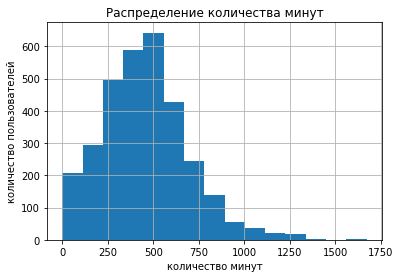

In [34]:
# гистограмма "количество минут"
df['sum_minutes'].hist(bins=15)
plt.title('Распределение количества минут')
plt.xlabel('количество минут')
plt.ylabel('количество пользователей');

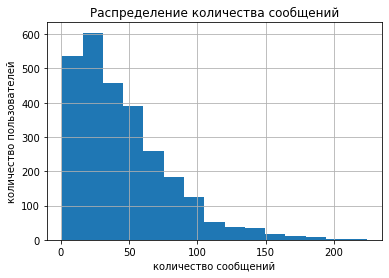

In [35]:
# гистограмма "количество сообщений"
df['count_messages'].hist(bins=15)
plt.title('Распределение количества сообщений')
plt.xlabel('количество сообщений')
plt.ylabel('количество пользователей');

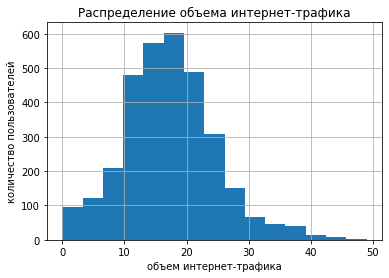

In [36]:
# гистограмма "объем интернет-трафика"
df['mb_used_sum'].hist(bins=15)
plt.title('Распределение объема интернет-трафика')
plt.xlabel('объем интернет-трафика')
plt.ylabel('количество пользователей');

Рассчитав среднее значения, мы видим, что и для тарифа "смарт" и для тарифа "ультра" имеется положительная тенденция к росту числа минут, сообщений и интернет-трафика в течение года. Среднее значение по всем трем параметрам выше в тарифк "ультра". При этом пользователи более дорого тарифа в среднем не тратят весь пакет услуг, в то время как пользователи "смарта" 10 месяцев подряд использовали больше сообщений, чем предполагает их тарифный план и 9 месяцев тратили больше интернета. Посчитанное стандартное отклонение говорит, что данные достаточно сильно разбросаны (например, в декабре для тарифа "смарт" стандартное отклонение количества минут составило 197,8, а для тарифа "ультра" - 328,6). Построенные гистограммы показали, что данные скошены вправо. Для скошенных вправо данных медиана будет меньше среднего,среднее «поедет» в ту сторону, где есть дополнительные значения. Гисограмма объема трафика более симметричная, т.е. стремится к нормальному распределению.

## Проверка гипотезы

Для удобства нулевую гипотезу сформулируем следующим образом: "средняя выручка пользователей тарифов «Ультра» и «Смарт» равны". Альтернативная гипотиза тогда звучит "средняя выручка пользователей тарифов «Ультра» и «Смарт» не равна". Для рассчетов будем использовать метод `st.ttest_ind()`. Для этого создадим два списка с выручкой по каждому тарифу, p-value (alpha) зададим 5%.

In [37]:
# создание списка с выручкой пользователей тарифа смарт
smart = df.query('tariff=="smart"')['revenue'].tolist()
smart

[1150.0,
 550.0,
 550.0,
 1150.0,
 1550.0,
 950.0,
 550.0,
 1350.0,
 1150.0,
 550.0,
 550.0,
 886.0,
 1186.0,
 835.0,
 886.0,
 775.0,
 949.0,
 556.0,
 1219.0,
 694.0,
 838.0,
 550.0,
 950.0,
 550.0,
 550.0,
 550.0,
 1550.0,
 1350.0,
 750.0,
 1550.0,
 550.0,
 1350.0,
 550.0,
 1150.0,
 685.0,
 981.0,
 1750.0,
 1015.0,
 550.0,
 990.0,
 550.0,
 568.0,
 550.0,
 550.0,
 550.0,
 750.0,
 2550.0,
 2350.0,
 1950.0,
 1550.0,
 950.0,
 1350.0,
 550.0,
 750.0,
 550.0,
 1350.0,
 1350.0,
 550.0,
 1150.0,
 1150.0,
 950.0,
 1356.0,
 1795.0,
 1950.0,
 1540.0,
 2553.0,
 2150.0,
 550.0,
 950.0,
 2750.0,
 2550.0,
 2150.0,
 1950.0,
 1350.0,
 3350.0,
 1950.0,
 550.0,
 550.0,
 2550.0,
 3150.0,
 2750.0,
 2750.0,
 2153.0,
 2550.0,
 2559.0,
 550.0,
 1019.0,
 3040.0,
 1838.0,
 3004.0,
 1004.0,
 1235.0,
 1983.0,
 1622.0,
 550.0,
 950.0,
 1350.0,
 950.0,
 1150.0,
 1750.0,
 1750.0,
 750.0,
 550.0,
 1672.0,
 550.0,
 750.0,
 550.0,
 986.0,
 3321.0,
 550.0,
 550.0,
 1906.0,
 694.0,
 781.0,
 1150.0,
 592.0,
 1009.0,
 739

In [38]:
# создание списка с выручкой пользователей тарифа ультра
ultra = df.query('tariff=="ultra"')['revenue'].tolist()
ultra

[1950.0,
 1950.0,
 1950.0,
 1950.0,
 1950.0,
 1950.0,
 1950.0,
 1950.0,
 1950.0,
 1950.0,
 1950.0,
 1950.0,
 1950.0,
 1950.0,
 1950.0,
 1950.0,
 1950.0,
 1950.0,
 1950.0,
 1950.0,
 1950.0,
 1950.0,
 1950.0,
 1950.0,
 1950.0,
 1950.0,
 1950.0,
 1950.0,
 1950.0,
 1950.0,
 1950.0,
 1950.0,
 1950.0,
 1950.0,
 1950.0,
 1950.0,
 1950.0,
 1950.0,
 1950.0,
 1950.0,
 1950.0,
 1950.0,
 1950.0,
 1950.0,
 1950.0,
 1950.0,
 1950.0,
 1950.0,
 1950.0,
 1950.0,
 3900.0,
 2850.0,
 1950.0,
 1950.0,
 1950.0,
 1950.0,
 1950.0,
 1950.0,
 1950.0,
 1950.0,
 1950.0,
 1950.0,
 1950.0,
 1950.0,
 1950.0,
 1950.0,
 1950.0,
 1950.0,
 1950.0,
 1950.0,
 1950.0,
 1950.0,
 1950.0,
 1950.0,
 1950.0,
 1950.0,
 1950.0,
 1950.0,
 2700.0,
 1950.0,
 1950.0,
 1950.0,
 1950.0,
 1950.0,
 1950.0,
 1950.0,
 1950.0,
 1950.0,
 1950.0,
 1950.0,
 1950.0,
 1950.0,
 1950.0,
 1950.0,
 1950.0,
 1950.0,
 1950.0,
 3900.0,
 1950.0,
 1950.0,
 1950.0,
 1950.0,
 1950.0,
 1950.0,
 1950.0,
 1950.0,
 1950.0,
 1950.0,
 1950.0,
 1950.0,
 1950.0,
 

In [39]:
# проверка нулевой гипотезы
alpha = .05 

results = st.ttest_ind(
    smart, 
    ultra)

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение:  1.4229814360764067e-160
Отвергаем нулевую гипотезу


Нулевая гипотиза отвергается, а это значит, что средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются.

Тоже самое проведелаем с нулевой гипотизой "средняя выручка пользователей из Москвы не отличается от выручки пользователей из других регионов". (Альтернативная гипотиза - средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов)

In [40]:
# создание списка с выручкой пользователей из Москвы
moscow = df.query('city=="Москва"')['revenue'].tolist()
moscow

[1150.0,
 550.0,
 1950.0,
 1950.0,
 1950.0,
 1950.0,
 1950.0,
 550.0,
 1150.0,
 685.0,
 981.0,
 1750.0,
 1015.0,
 550.0,
 990.0,
 550.0,
 1045.0,
 736.0,
 550.0,
 2031.0,
 2831.0,
 1640.0,
 2616.0,
 1816.0,
 950.0,
 550.0,
 950.0,
 550.0,
 3233.0,
 1950.0,
 1950.0,
 1950.0,
 1950.0,
 1950.0,
 1950.0,
 1950.0,
 1950.0,
 1950.0,
 1950.0,
 550.0,
 601.0,
 1750.0,
 2150.0,
 550.0,
 550.0,
 1950.0,
 1950.0,
 1950.0,
 1950.0,
 1950.0,
 1950.0,
 1950.0,
 1950.0,
 1950.0,
 1950.0,
 550.0,
 550.0,
 1556.0,
 2601.0,
 3375.0,
 2210.0,
 1807.0,
 2605.0,
 3195.0,
 1954.0,
 2234.0,
 550.0,
 550.0,
 619.0,
 976.0,
 589.0,
 550.0,
 712.0,
 592.0,
 604.0,
 634.0,
 550.0,
 2916.0,
 1942.0,
 3375.0,
 2550.0,
 798.0,
 550.0,
 1908.0,
 3202.0,
 550.0,
 871.0,
 826.0,
 1009.0,
 859.0,
 550.0,
 730.0,
 784.0,
 1950.0,
 1950.0,
 1950.0,
 1950.0,
 1950.0,
 1950.0,
 1950.0,
 1950.0,
 1950.0,
 1950.0,
 1950.0,
 1950.0,
 1950.0,
 1950.0,
 1950.0,
 619.0,
 1016.0,
 721.0,
 550.0,
 1864.0,
 1350.0,
 1954.0,
 1470.0

In [41]:
# создание списка с выручкой пользователей из регионов
regions = df.query('city!="Москва"')['revenue'].tolist()
regions

[1950.0,
 1950.0,
 1950.0,
 1950.0,
 1950.0,
 1950.0,
 1950.0,
 1950.0,
 550.0,
 1150.0,
 1550.0,
 950.0,
 550.0,
 1350.0,
 1150.0,
 1950.0,
 1950.0,
 1950.0,
 1950.0,
 1950.0,
 1950.0,
 1950.0,
 1950.0,
 550.0,
 550.0,
 886.0,
 1186.0,
 835.0,
 886.0,
 775.0,
 949.0,
 556.0,
 1219.0,
 694.0,
 838.0,
 550.0,
 950.0,
 550.0,
 550.0,
 550.0,
 1550.0,
 1350.0,
 750.0,
 1550.0,
 550.0,
 1350.0,
 568.0,
 550.0,
 550.0,
 550.0,
 750.0,
 2550.0,
 2350.0,
 1950.0,
 1550.0,
 950.0,
 1350.0,
 550.0,
 750.0,
 550.0,
 1350.0,
 1350.0,
 550.0,
 1150.0,
 1150.0,
 950.0,
 1356.0,
 1795.0,
 1950.0,
 1540.0,
 2553.0,
 2150.0,
 550.0,
 950.0,
 2750.0,
 2550.0,
 2150.0,
 1950.0,
 1350.0,
 3350.0,
 1950.0,
 550.0,
 1950.0,
 1950.0,
 550.0,
 2550.0,
 3150.0,
 2750.0,
 2750.0,
 2153.0,
 2550.0,
 2559.0,
 550.0,
 1019.0,
 3040.0,
 1838.0,
 3004.0,
 1004.0,
 1235.0,
 1983.0,
 1622.0,
 1950.0,
 1950.0,
 550.0,
 950.0,
 1350.0,
 950.0,
 1150.0,
 1750.0,
 1750.0,
 750.0,
 1950.0,
 1950.0,
 1950.0,
 1950.0,
 1950

In [42]:
# проверка нулевой гипотезы
alpha = .05 

results = st.ttest_ind(
    moscow, 
    regions)

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение:  0.5440152911670224
Не получилось отвергнуть нулевую гипотезу


Нулевая гипотеза не была отвергнута, а значит средняя выручка пользователей из Москвы не отличается от выручки пользователей из других регионов.

## Общий вывод

Было проведено исследование информации о 500 пользователях "Мегалайна": кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Данные хорошего качества, так как в них нет пропусков. За исключением столбца churn_date, но это не является ошибкой, поскольку пользователь еще пользовался тарифом на момент выгрузки данных. В распоряжении у нас было 5 таблиц с информацией о пользователях, звонках, сообщениях, интернет-сессиях и тарифах.

В дальнейшем для удобства расчетов данные были соединены в одну таблицу. В ходе предобработке данных был изменен тип данных в столбцах с датами на datetime, а также произведено округление секунд до минут у длительности звонков и округление интернет-трафика до гигабайтов. Было посчитано для каждого пользователя: количество сделанных звонков и израсходованных минут разговора по месяцам, количество отправленных сообщений по месяцам, объем израсходованного интернет-трафика по месяцам, помесячная выручка с каждого пользователя.

Были произведены рассчеты среднего количества, дисперсии и стандартного отклонения количества звонков, собщений и объема интернет трафика для пользователей каждого тарифа в месяц. Рассчеты показали, что и для тарифа "смарт" и для тарифа "ультра" имеется положительная тенденция к росту числа минут, сообщений и интернет-трафика в течение года. Среднее значение по всем трем параметрам выше в тарифк "ультра". При этом пользователи более дорого тарифа в среднем не тратят весь пакет услуг, в то время как пользователи "смарта" 10 месяцев подряд использовали больше сообщений, чем предполагает их тарифный план и 9 месяцев тратили больше интернета. Посчитанное стандартное отклонение говорит, что данные достаточно сильно разбросаны (например, в декабре для тарифа "смарт" стандартное отклонение количества минут составило 197,8, а для тарифа "ультра" - 328,6). Построенные гистограммы показали, что данные скошены вправо. Для скошенных вправо данных медиана будет меньше среднего,среднее «поедет» в ту сторону, где есть дополнительные значения. Гисограмма объема трафика более симметричная, т.е. стремится к нормальному распределению.

Было выдвенуто и проверено две гипотезы. Первая гипотеза была отвергнута, альтернативная ей - "средняя выручка пользователей тарифов «Ультра» и «Смарт» различается". Вторая же гипотеза, наоборот, не была отвергнута, то есть средняя выручка пользователей из Москвы не отличается от выручки пользователей из других регионов.